In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data= open('/tmp/sonnets.txt').read()

corpus= data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences= []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
	
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-08 20:38:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-08 20:38:45 (150 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True))) # An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer
model.add(LSTM(100)) # Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax')) # A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 12ms/step - loss: 6.9023 - accuracy: 0.0195
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5050 - accuracy: 0.0222
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4150 - accuracy: 0.0259
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3008 - accuracy: 0.0282
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1982 - accuracy: 0.0348
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1051 - accuracy: 0.0376
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0179 - accuracy: 0.0404
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9205 - accuracy: 0.0455
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8238 - accuracy: 0.0514
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.716

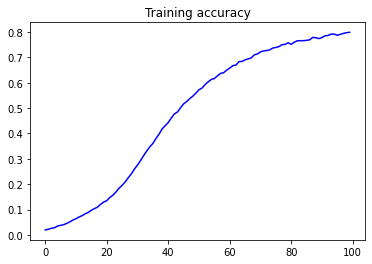

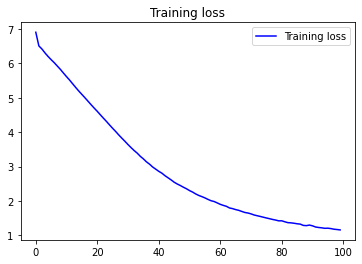

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "The dark fire will not avail you, flame of Udûn. Go back to the Shadow! YOU! SHALL NOT! PASS!"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding = 'pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word
print(seed_text)

The dark fire will not avail you, flame of Udûn. Go back to the Shadow! YOU! SHALL NOT! PASS! days room none 'will ' lies back less now things increase arising twain days days go o'er days twain go back back back afford about heaven used go days out skill cold days brought alone back back did fawn up thee did left them he must you see seen hell alone lies hence bad days still o'er lend thee lie to shown appear write of change me bright be good ground kind ill ' hid see heaven alone dead grow sad hate used hits bide thee thus sun back live long rare live now be dear foes days ' did
